Use data to predict the chances of student getting addmission and check the accuracy of each model

Content <br>
The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :<br>

GRE Scores ( out of 340 )<br>
TOEFL Scores ( out of 120 )<br>
University Rating ( out of 5 )<br>
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )<br>
Undergraduate GPA ( out of 10 )<br>
Research Experience ( either 0 or 1 )<br>
Chance of Admit ( ranging from 0 to 1 ) is the Target Variable<br> 

Models <br>

Linear Regression <br>
Logistic Regression <br>
# Random Forest <br>
Support Vector Machine <br> (SVC and SVR)

In [57]:
#use SVR for https://github.com/srinivasav22/Graduate-Admission-Prediction/blob/master/Admission_Predict_Ver1.1.csv
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

Exploratory Data Analysis

In [58]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [59]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [60]:
#LOR and Chance of Admit has space after it 
data.columns =[index.strip() for index in data.columns]

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [62]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Data is in form of int and float not objects with spaces <br>
Data has no null values <br>
To check - outliers and distribution

In [63]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


Data has to be scaled as values range from 0.5 in Research to 340 for GRE Score <br>
The column Serial No. may not be required <br>
To check - outliers in graphical format

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

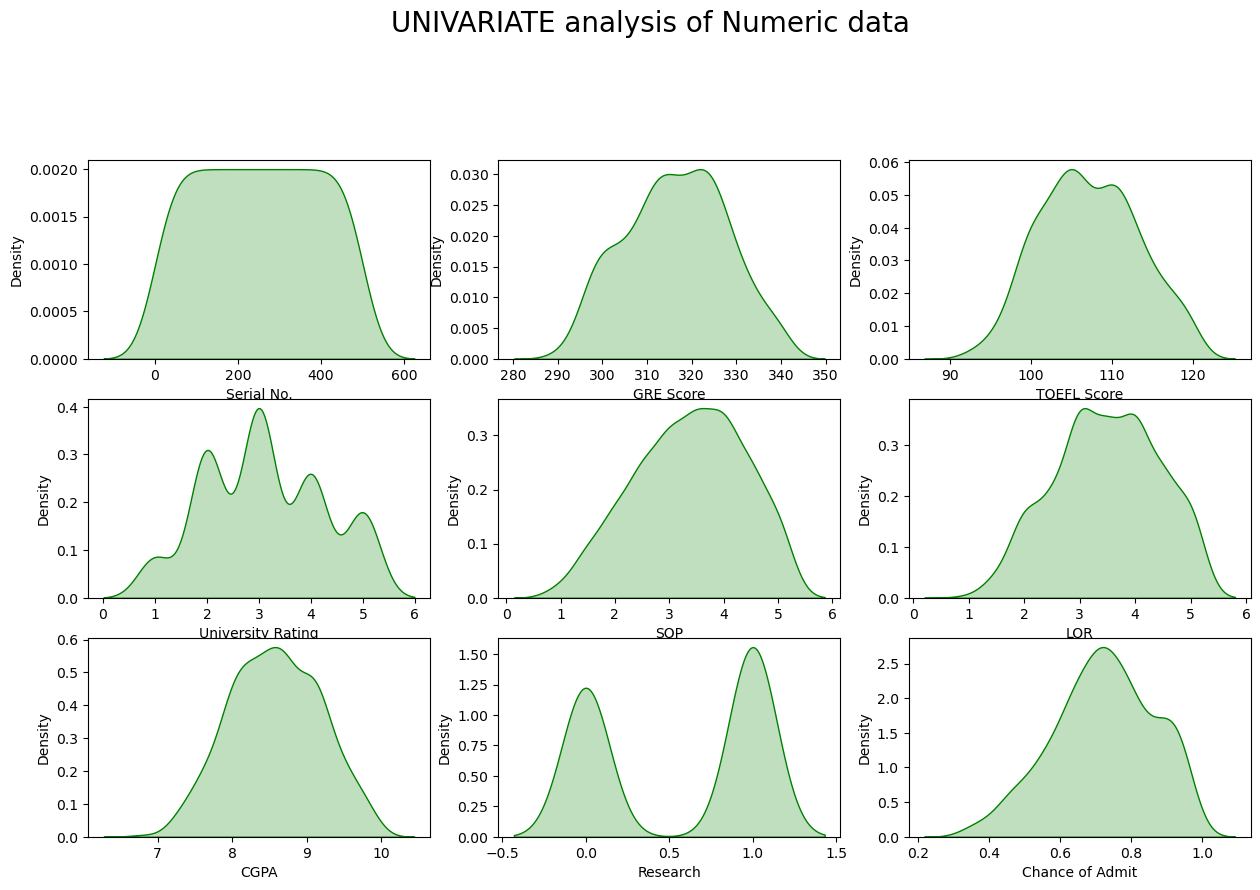

In [65]:
plt.figure(figsize=(15,15))
plt.suptitle("UNIVARIATE analysis of Numeric data", fontsize = 20)
for i in range(0,len(data.columns)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(x = data[data.columns[i]], fill = True, color = 'g')
  plt.xlabel(data.columns[i])

Does not show much skewness and outliers <br>
Note that Research is just 0 or 1 but the graph comes like saddle gaussian <br>
In some cases it might be better to do histogram hist = df.hist(bins=3)

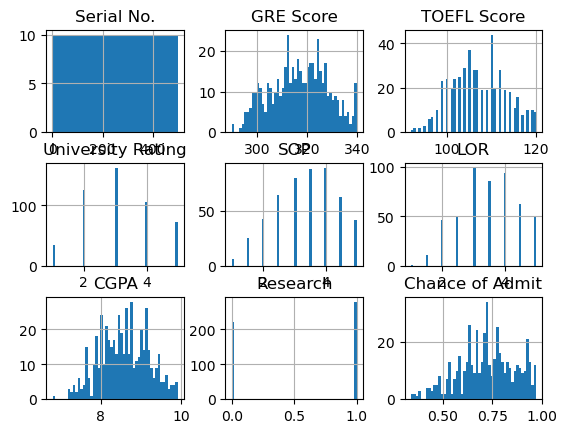

In [66]:
hist = data.hist(bins=50)

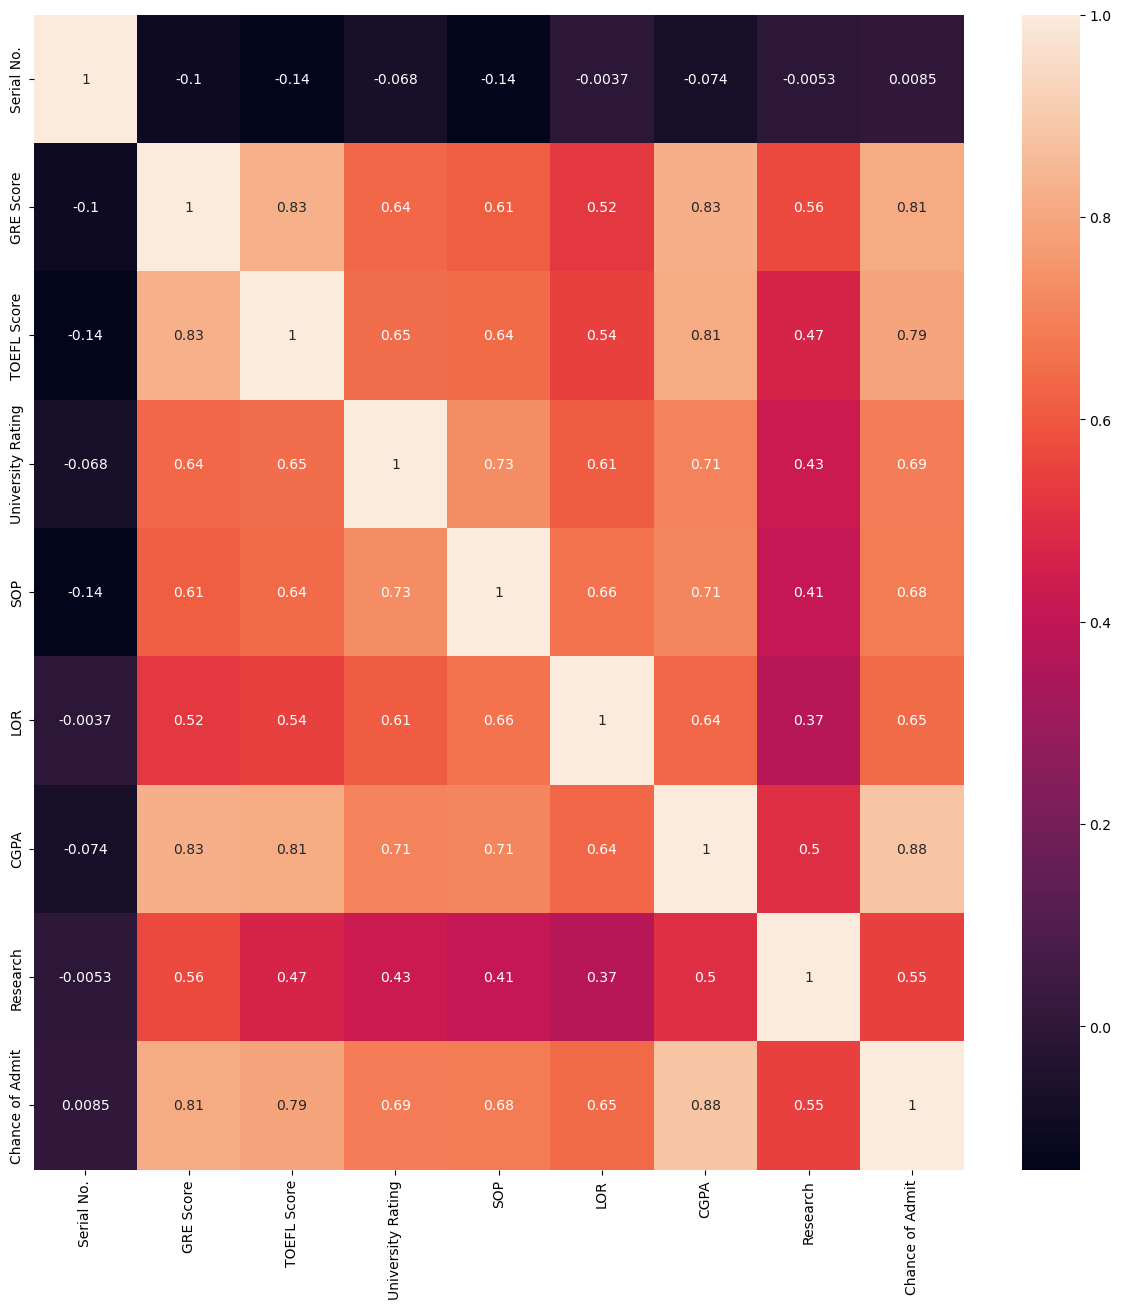

In [67]:
#checking for correlation to verify whether any column may be eliminated
#data.corr()
plt.figure(figsize =(15,15))
sns.heatmap(data.corr(), annot =True)
plt.show()

'CGPA' has high correlation to 'chance of admit' but we need to remove 'Chance of Admit' for the model <br>
Hence not necessary to remove any columns except 'Serial No.' <br>

In [75]:
##checking for correlation visually
#for feature in data.columns:
  #sns.scatterplot(data = data, x = feature, y = 'Chance of Admit')
  #plt.show()

In [76]:
##checking for correlation visually
#sns.pairplot(data, hue="Chance of Admit")

Feature Engineering

In [77]:
data1 = data.drop(['Serial No.'], axis = 1)
data1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


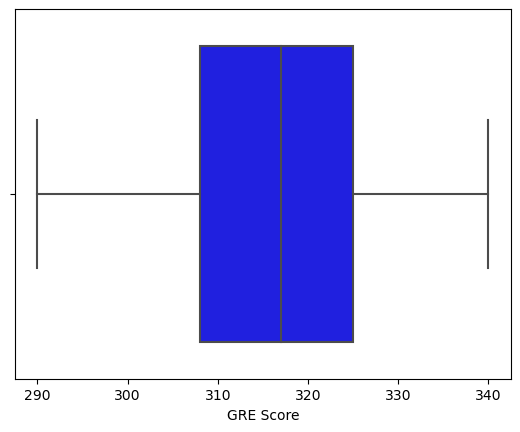

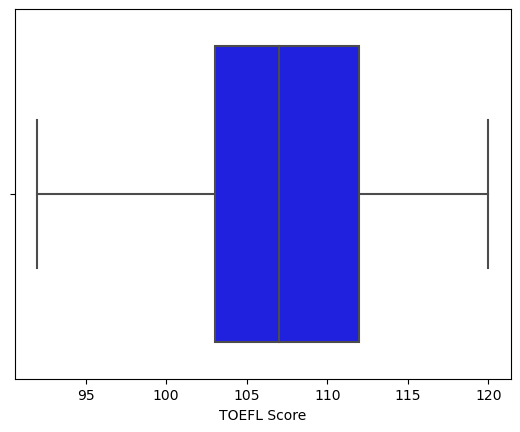

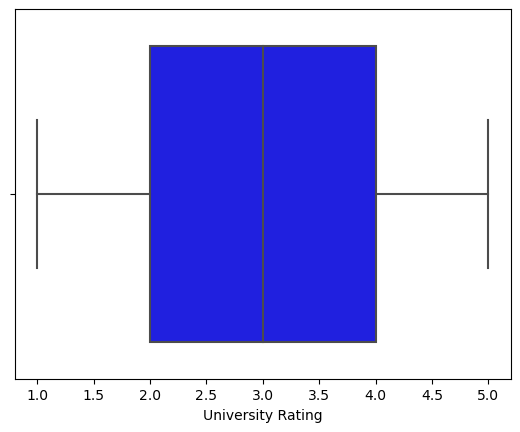

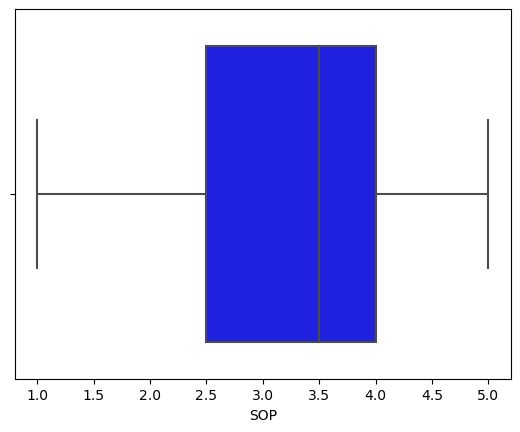

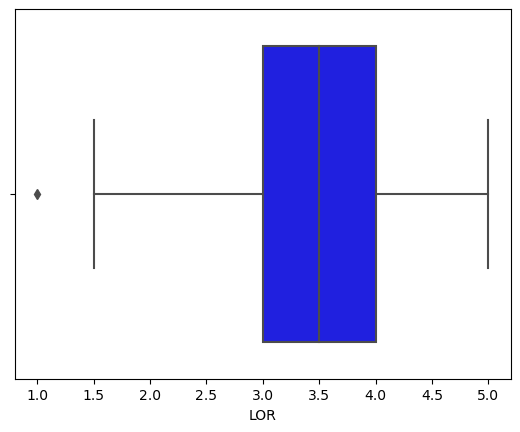

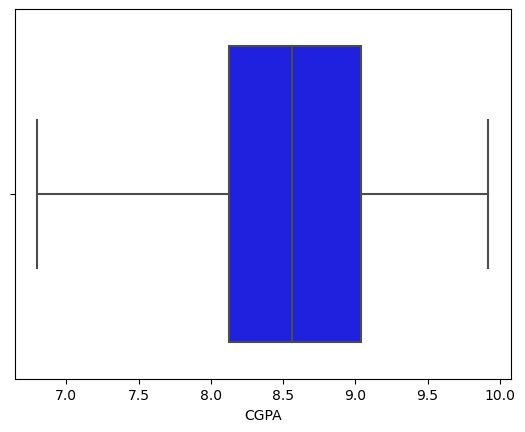

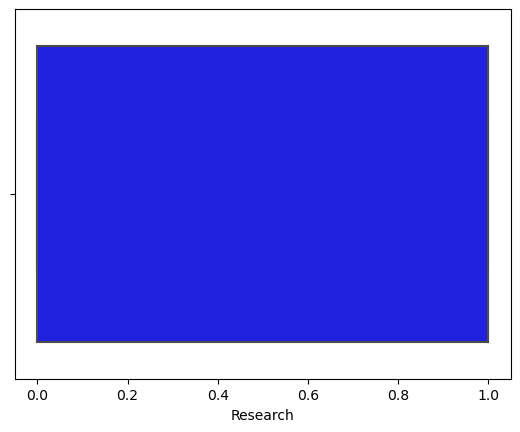

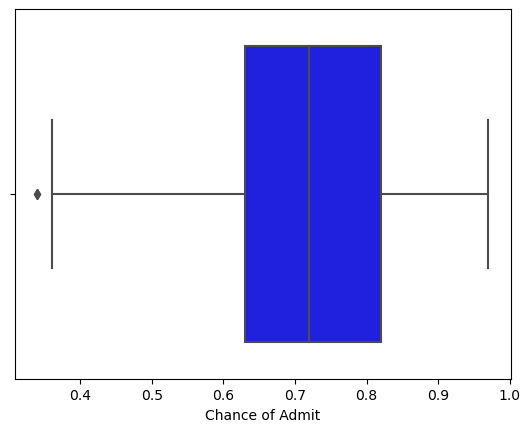

In [79]:
for feature in data1.columns:
  sns.boxplot(data =data1, x = feature, color = 'b')
  plt.show()

There are very less outliers and we may ignore them but for learning sake we will remove outliers

In [81]:
import numpy as np

In [82]:
#def remove_outliers(Numeric_feature) and replace with outer bounds:
for i in data1.columns:
    q1 = data1[i].quantile(0.25)
    q3 = data1[i].quantile(0.75)
    IQR = q3-q1
    lower_bound = q1-0.5*(IQR)
    upper_bound = q3+0.5*(IQR)
    data1[i] = np.where(data1[i]>upper_bound, upper_bound, data1[i])
    data1[i] = np.where(data1[i]<lower_bound, lower_bound, data1[i])

In [84]:
##check whehter outliers have been removed or not
#for feature in data1.columns:
#  sns.boxplot(data =data1, x = feature, color = 'b')
#  plt.show()

In [86]:
data1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,333.5,116.5,4.0,4.5,4.5,9.49625,1.0,0.915
1,324.0,107.0,4.0,4.0,4.5,8.87000,1.0,0.760
2,316.0,104.0,3.0,3.0,3.5,8.00000,1.0,0.720
3,322.0,110.0,3.0,3.5,2.5,8.67000,1.0,0.800
4,314.0,103.0,2.0,2.0,3.0,8.21000,0.0,0.650


Training and Test Data

In [88]:
X = data1.drop(['Chance of Admit'], axis =1)
y = data1['Chance of Admit']
X,y

(     GRE Score  TOEFL Score  University Rating   SOP  LOR     CGPA  Research
 0        333.5        116.5                4.0  4.50  4.5  9.49625       1.0
 1        324.0        107.0                4.0  4.00  4.5  8.87000       1.0
 2        316.0        104.0                3.0  3.00  3.5  8.00000       1.0
 3        322.0        110.0                3.0  3.50  2.5  8.67000       1.0
 4        314.0        103.0                2.0  2.00  3.0  8.21000       0.0
 ..         ...          ...                ...   ...  ...      ...       ...
 495      332.0        108.0                5.0  4.50  4.0  9.02000       1.0
 496      333.5        116.5                5.0  4.75  4.5  9.49625       1.0
 497      330.0        116.5                5.0  4.50  4.5  9.49625       1.0
 498      312.0        103.0                4.0  4.00  4.5  8.43000       0.0
 499      327.0        113.0                4.0  4.50  4.5  9.04000       0.0
 
 [500 rows x 7 columns],
 0      0.915
 1      0.760
 2      0

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [169]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 7), (150, 7), (350,), (150,))

Scaling - Fit and Transform

In [170]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

Feature scaling is a method used to normalize the range of independent variables or features of data. We need to perform Feature Scaling when we are dealing with Gradient Descent Based algorithms (Linear and Logistic Regression, Neural Network) and Distance-based algorithms (KNN, K-means, SVM) as these are very sensitive to the range of the data points. Scaling inputs helps to avoid the situation, when one or several features dominate others in magnitude, as a result, the model hardly picks up the contribution of the smaller scale variables, even if they are strong. Puts values between [-1,1]

In [172]:
X_train_transform = scaler.fit_transform(X_train)
X_test_transform = scaler.transform(X_test)
print(scaler.mean_)

[316.81285714 107.24142857   3.09428571   3.38714286   3.54
   8.589025     0.55142857]


Scaler is an instance ibject of StandardScaler class. it 'fits' (finds mean and sd) for training data and uses same for transforming both train and test data to prevent overfitting of test data

Linear Regression Model Analysis

In [139]:
from sklearn.linear_model import LinearRegression
model_linear_reg = LinearRegression().fit(X_train_transform, y_train)
print(model_linear_reg.coef_, model_linear_reg.intercept_)

[0.01451191 0.01402871 0.00981272 0.00737178 0.00521203 0.06678727
 0.01073314] 0.7286857142857144


In [140]:
#check accuracy
model_linear_reg.score(X_train_transform, y_train)

0.8410991762373548

We have an accuracy of about 84% hence we will predict and compare with test data

In [148]:
# after learning from training data we use the 'linear_reg' to predict
linear_prediction = model_linear_reg.predict(X_test_transform)
linear_prediction, y_test

(array([7.08419074, 7.31408044, 7.33378329, 7.18516228, 7.61644076,
        7.74296439, 7.3830697 , 7.7743681 , 7.62622563, 7.35656037,
        7.02733513, 7.23429119, 7.3359279 , 7.41606601, 7.9041901 ,
        7.95340531, 7.42502816, 7.32408149, 7.50828858, 7.66810419,
        7.73284792, 7.11335532, 7.73759743, 7.46724159, 7.71360097,
        7.00491632, 7.67564563, 7.60450697, 7.64642269, 7.71767706,
        7.82812174, 7.64684576, 7.23907659, 7.83623704, 7.29534166,
        7.38097728, 7.85031044, 7.57366425, 7.27135391, 7.43918901,
        7.32753416, 7.78074296, 7.31272372, 7.91202328, 7.77249523,
        7.92768032, 7.74018258, 7.50357052, 7.33794459, 7.42456501,
        7.63836115, 7.88454058, 7.03486759, 7.31399088, 7.47991205,
        7.68757418, 7.39652014, 7.179466  , 7.64490537, 7.63100152,
        7.05755095, 7.66312632, 7.66397314, 7.41267854, 7.34116807,
        7.9479923 , 7.95340531, 7.44856709, 7.34311587, 7.5723508 ,
        7.24742126, 7.2266869 , 7.23340259, 7.24

the linear regression predicted values and y_test values have a factor of 10 difference

In [147]:
from sklearn.metrics import r2_score
r2_score(y_test, linear_prediction)

-3165.950790480526

Text(0, 0.5, 'Predicted test data')

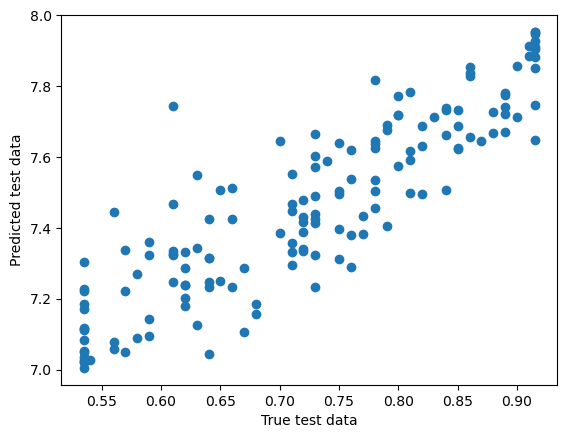

In [142]:
#compare the predicted and y test data
plt.scatter(y_test, linear_prediction)
plt.xlabel("True test data")
plt.ylabel("Predicted test data")
#this plot should not have any trend

In [160]:
#y_test

In [161]:
residuals = y_test - linear_prediction
#residuals

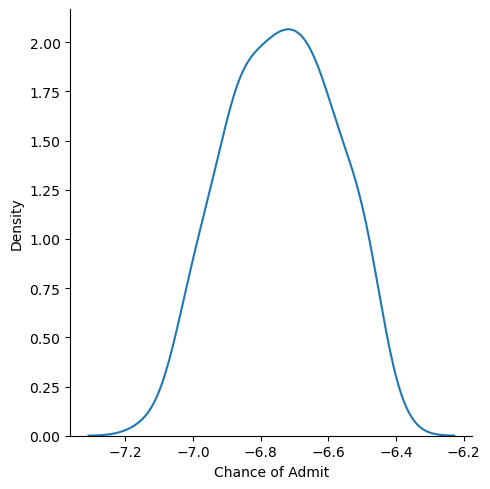

In [150]:
sns.displot(residuals, kind = 'kde')

Text(0, 0.5, 'residual')

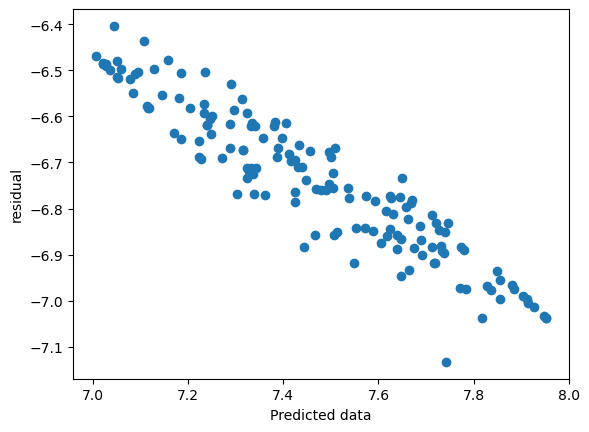

In [155]:
plt.scatter(x = linear_prediction, y = residuals)
plt.xlabel("Predicted data")
plt.ylabel("residual")

This type of graph is not good as it shows a trend <br>
A proper graph should show a spherical shape

In [151]:
#mean square error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, linear_prediction)

45.43780535341407

In [154]:
#root mean square error
np.sqrt(mean_squared_error(y_test, linear_prediction))

6.74075703118085

In [153]:
#absolute mean square error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, linear_prediction)

6.738884229681943

Logistic Regression is not possible as it is a continuous data and not a classification data <br>
Doing a lasso regression

In [158]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=0.1)
model_lasso_reg = lasso_reg.fit(X_train,y_train)
model_lasso_reg.score(X_test, y_test), model_lasso_reg.score(X_train, y_train)

(-0.6200426745694148, 0.15086922814769554)

Text(0, 0.5, 'predicted data')

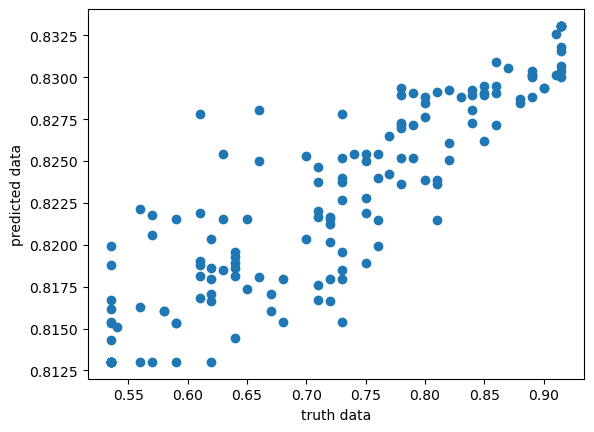

In [159]:
lasso_pred = model_lasso_reg.predict(X_test)
plt.scatter(y_test, lasso_pred)
plt.xlabel("true data")
plt.ylabel("predicted data")

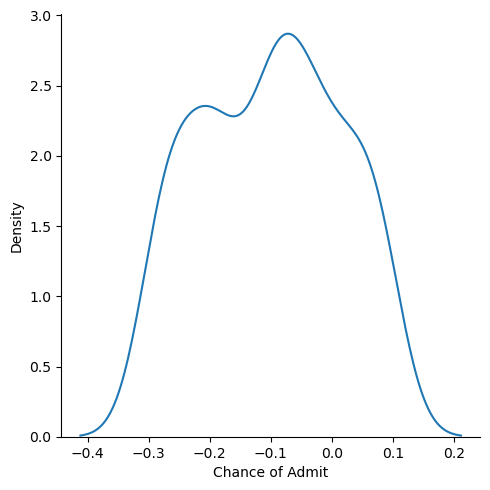

In [162]:
lasso_residuals = y_test - lasso_pred
sns.displot(lasso_residuals, kind = 'kde')

Text(0, 0.5, 'residual')

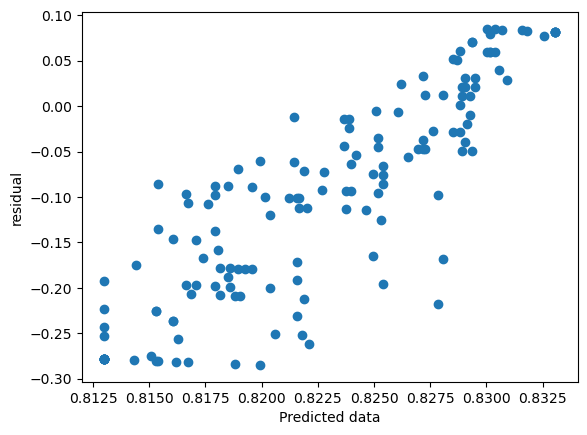

In [163]:
plt.scatter(x = lasso_pred, y = lasso_residuals)
plt.xlabel("Predicted data")
plt.ylabel("residual")

This type of distribution is not expected 

SVC model Analysis cannot be done as it is a continuous data

In [ ]:
SVR model analysis

In [174]:
from sklearn.svm import SVR
model_SVR = SVR()
model_SVR.fit(X_train_transform,y_train)

SVR()

In [176]:
model_SVR.score(X_train_transform,y_train)

0.7195995016170034

Text(0, 0.5, 'predicted data')

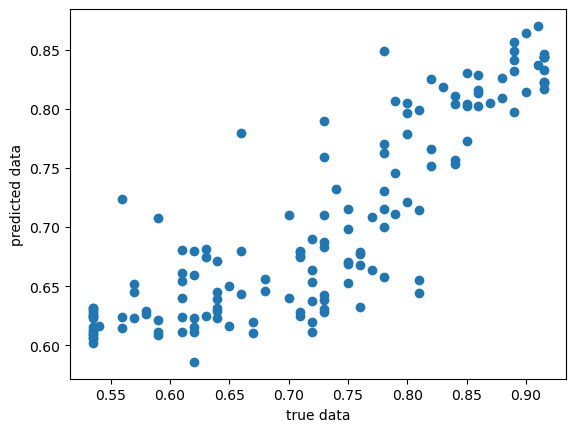

In [179]:
SVR_predict = model_SVR.predict(X_test_transform)
plt.scatter(y_test, SVR_predict)
plt.xlabel("true data")
plt.ylabel("predicted data")

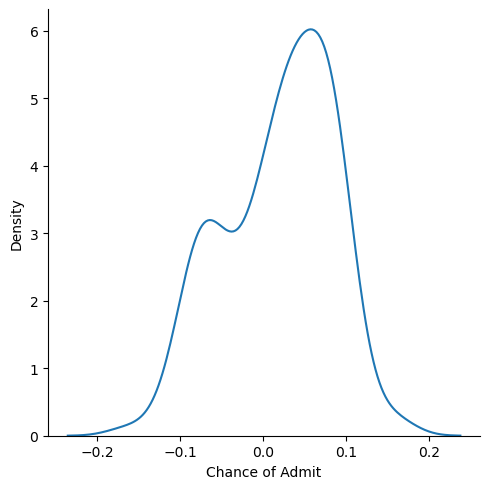

In [181]:
SVR_residuals = y_test - SVR_predict
sns.displot(SVR_residuals, kind = 'kde')

Text(0, 0.5, 'residual')

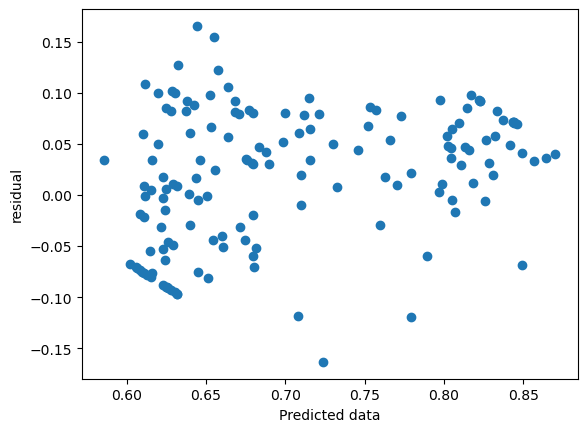

In [182]:
plt.scatter(x = SVR_predict, y = SVR_residuals)
plt.xlabel("Predicted data")
plt.ylabel("residual")

This plot is more like what is expected as well as the tru vs predicted data is a 45 deg line approx.